## Credit assignment in a large-scale neuroscience collaboration
By Anne Urai, CSHL, 2020

To fairly acknowledge work of the 36 authors of the IBL's first overview paper (https://doi.org/10.1101/2020.01.17.909838), we experimented with several ways of defining authorship and contribution statement. Here's an overview of what worked, what didn't work, and what we ultimately settled on.

## Issue 1: author order
Traditionally, papers in neuroscience list the authors in specific order: the person who lead the project (usually a postdoc or PhD student) goes first, then everyone in decreasing order of importance in the middle, and the laboratory head (PI) goes last. 

Would this work for a large collaborative paper like the IBL? We quickly realized the answer is *no*, for a couple of reasons:
* no single person took the lead on the project
* no single person was the head PI on the project
* there are a huge number of authors who contributed in very different ways, making it impossible to assign an order (comparing apples to oranges).
* even if we allow for shared first authorship (as is becoming increasingly common in the field), we would struggle to determine 1. who gets to be part of that shared-first list, 2. what is the order within that shared-first list, and 3. what's the order of authors after that.

Our answer: _the alphabetical author list_. While common in e.g. physics, this idea is met with a lot of suspicion in neuroscience. It has the following advantages:
* no more tension, disappointment and negotiation over author order
* adding authors at a later stage is easy
* the contribution statement (more below) can be used to indicate fine-grained information about each person's role in the project.

__Note__: we decided to make 'The International Brain Laboratory' the first author on every IBL Overview Paper. This will lead to all those papers being cited as 'The IBL et al., 2020a, 2020b, 2020c'. Not only does this focus on the collaboration instead of the individuals, it also avoids the situation that Barbara Aaron gets mistaken for the lead author of the paper.

## Issue 2: the contribution statement

Without author order to convey credit, we moved to the contribution statement. In the following order, we tried a few formats:

### 1. the free-for-all table
Inspired by Nick Steinmetz (https://twitter.com/SteinmetzNeuro/status/1147241128858570752), we created a Google Sheets where everyone could put their name, and each of the contributions they made, into a table. The value (1-5) then showed the level of contribution for that individual.

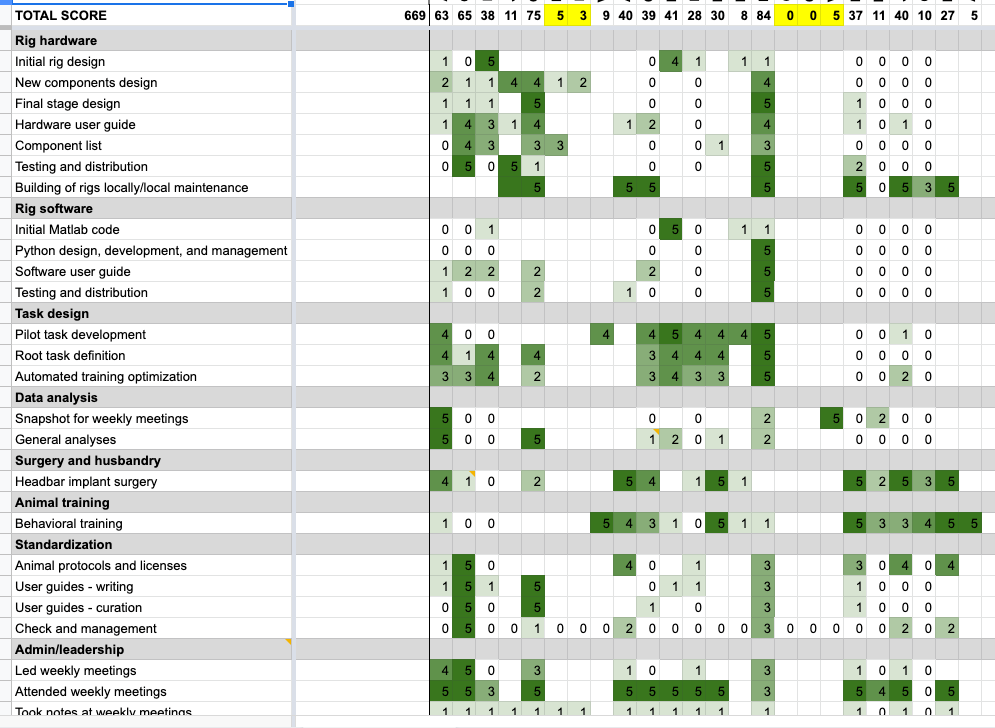

This did not work, for the following reasons:
* there was no curation of the tasks that could appear in the first column. The granularity thus ranged a lot, ranging from 'managed the collaboration' to 'ordered mouse food on Wednesday the 3rd of April' (not literally). 
* everyone worked on the same document simultaneously, so people often updated their statements after they saw what others wrote ('I forgot I did that too, I'd better still add it!').
* the levels 1-5 were ill-defined: does '5' mean you did that task all on your own; that you were a regular participant; or just that you worked really hard on it?
* adding numbers 1-5 led to a bit of a rat-race in accumulating a high total score, a bit like grade inflation.

### 2a. the free-form statement
We decided to take a step back, and instead (2 December 2019) gather each individual statement in a form that's as inclusive and free as possible. 
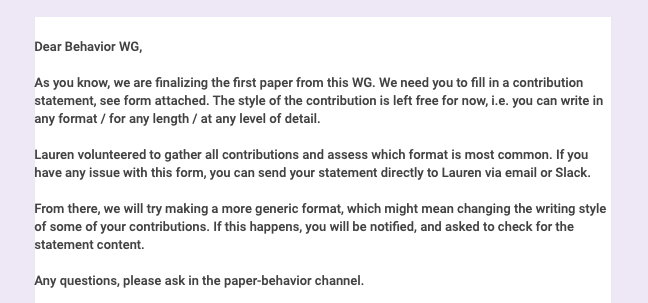

After Lauren Wool collected these statements, they were too varied to be useful. I did mine in bulletpoints, but others wrote a paragraph. 

### 2b. the structured statement
This quickly led to another attempt (7 January 2020) to a new request for contribution statements, now with a few restrictions:

Write in full sentences
Verbs should describe what you did for the project, not who you were.
_Yes_: X.Y.Z. wrote the abstract and attended WG meetings
_No_: X.Y.Z. was a writer for the abstract and was a member of the WG

While this more structured form helped, there was still a lot of variation in the level of detail that people listed (e.g. 'wrote the paper' vs. 'found literature references for paragraph 1-4 on page 3'.

### 3a. the CRediT-based statement
Meanwhile, the IBL's Publication WG had further discussions about streamlining contribution statements, leading to the following recommendation on January 17, 2020:
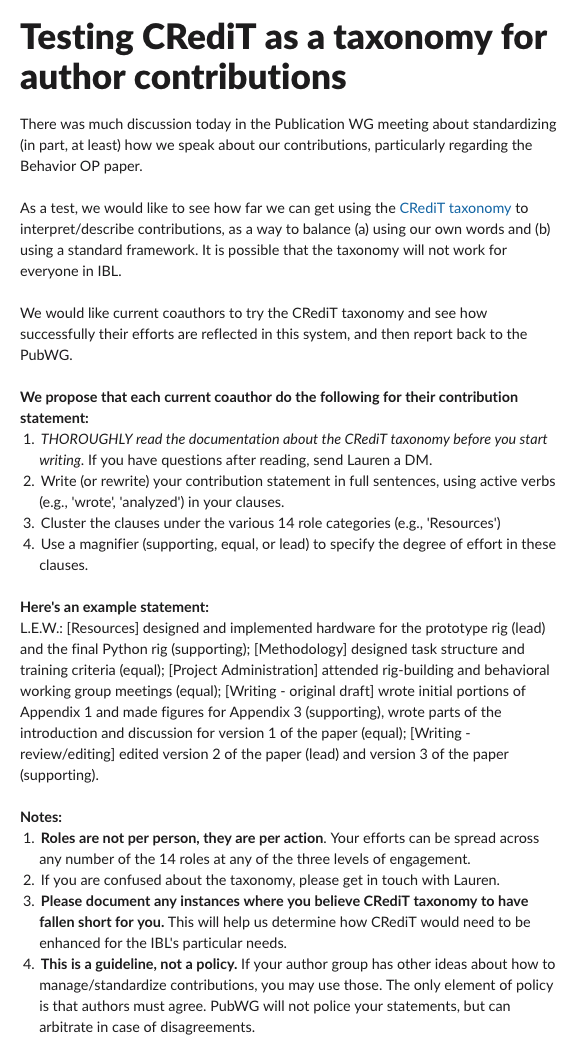

These contribution statements were collected in a Google Sheet. Specifying which levels of contribution were available (lead, equal, support) was a good level of granularity.

### 3b. the curated CRediT-based statement
Even this more streamlined, CRediT-based statement suffered from the following remaining problems:
* similar tasks were grouped, by different people, under various different CRediT categories (e.g. is 'Building rigs' Methodology or Investigation?)
* granularity differences remained: should rig maintanenace, surgeries, husbandry, and animal training all be grouped under 'collected behavioral data'?

This was solved in the good old fashioned way of having a huge Zoom meeting, and going one-by-one through each statement to equalize them. Matteo Carandini, Hannah Bayer, Lauren Wool and Gaelle Chapuis took the lead on this, and completed the long list of statements on 3 February 2020.

### 4. the curated CRediT-based table
While working on a revision of the paper in April 2020, I wanted to put our now-curated text statement back into a table to have a better vizual way of inspecting each person's contributions.

In [113]:
import pandas as pd
df = pd.read_csv('Behavior paper (2019) - Contribution statement - Written contributions.csv')
df = df.rename(columns={'First Name':'first_name', 'Last Name':'last_name', 
                        'credit_cleanup':'credit'})
df = df[['first_name', 'last_name', 'credit']]

In [114]:
new_df = []
for aidx, author in df.groupby(['last_name', 'first_name']):

    # tease apart the credit assignment column
    statement = author['credit'].item()
    statement_split = statement.split("[")
    for s in statement_split:
        cat_split = s.split("]")
        if len(cat_split) > 1:
            credit_category = cat_split[0]
            task_split = cat_split[1].split(")")
            for t in task_split:
                contrib_split = t.split("(")
                if len(contrib_split) ==2:
                    # print(contrib_split)
                    task = contrib_split[0]
                    contribution = contrib_split[1]
                    
                    # add these
                    new_df.append({'last_name':author.last_name.item(),
                                  'first_name':author.first_name.item(),
                                  'credit_category': credit_category.lower().replace('–', '-'),
                                  'task': task.lower(),
                                  'contribution': contribution.lower()})
                    
new_df = pd.DataFrame(new_df)
new_df

,last_name,first_name,credit_category,task,contribution
0,Aguillon Rodriguez,Valeria,methodology,"built pilot rigs, developed protocols for beh...",equal
1,Aguillon Rodriguez,Valeria,investigation,"collected behavioral data, performed surgery ...",equal
2,Angelaki,Dora,funding acquisition,acquired funding,supporting
3,Angelaki,Dora,resources,hosted the research,equal
4,Angelaki,Dora,supervision,supervised local laboratory research,equal
...,...,...,...,...,...
176,Wool,Lauren E.,funding acquisition,edited grant applications,supporting
177,Zador,Anthony,funding acquisition,acquired funding,equal
178,Zador,Anthony,resources,hosted the research,equal
179,Zador,Anthony,supervision,headed the behavior working group,lead


In [115]:
sorted(new_df.credit_category.unique())

['data curation',
 'formal analysis',
 'funding acquisition',
 'investigation',
 'methodology',
 'project administration',
 'resources',
 'software',
 'supervision',
 'validation',
 'visualization',
 'writing - original draft',
 'writing - review and editing']

In [116]:
new_df.contribution.unique()

array(['equal', 'supporting', 'lead'], dtype=object)

In [117]:
sorted(new_df.task.unique())

[' ',
 '  acquired funding ',
 '  collected behavioral data, performed surgeries and animal husbandry; built and maintained rigs ',
 ' acquired funding ',
 ' administered the collaboration ',
 ' analysed data as a second observer ',
 ' analyzed data and prepared figures for figure 1 ',
 ' analyzed data and prepared supplementary figures ',
 ' and developed and standardized animal training protocols ',
 ' and figure 4 ',
 ' and standardized the training protocol ',
 ' and standardized the training protocol for the final behavior task ',
 ' and surgery protocols ',
 ' and technical drawings ',
 ' and the final rig ',
 ' and version 3 of the paper ',
 ' attended behavior working group meetings ',
 ' attended behavioral working group meetings ',
 ' attended weekly behavioural group meetings ',
 ' built and maintained behavioral rigs, collected behaviroal data, and performed surgeries  ',
 ' built and maintained behavioral rigs, did surgeries and collected behavioral data ',
 ' built and ma